Weights = [0.251 0.253 0.24  0.249]
Bias = 0.012


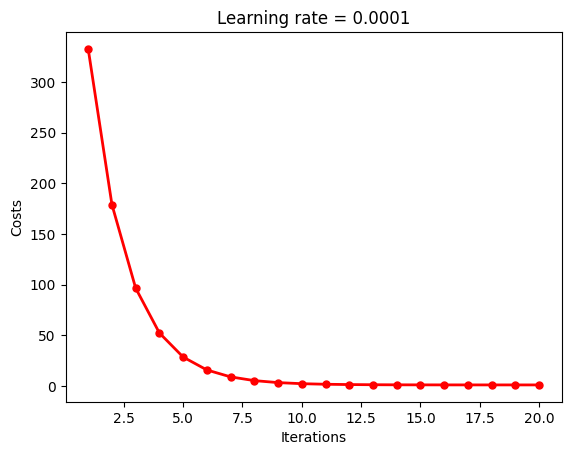

Trainset RMSE = 0.968
Testset RMSE = 0.752


In [2]:
# Textbook: Principles and Practices of Machine Learning
# Lab 2-2: linear regression (train + test)
# Author: Zhe Chen (ml_iot@163.com), 2021

import pandas
import numpy as np
import matplotlib.pyplot as plt

# parameters
iterations = 20 # number of iterations for training
learning_rate = 0.0001 # learning rate
m_train = 3000 # number of samples for training
flag_plot_lines = False # plot lines or not
plot_feature = 1 # which input feature will be used as x when flag_plot_lines = True
plot_skip = 4 # how many lines to skip in plotting when flag_plot_lines = True

# load dataset
df = pandas.read_csv('temperature_dataset.csv')
data = np.array(df)
m_all = np.shape(data)[0] # number of samples 
d = 1 if flag_plot_lines else np.shape(data)[1] - 1 # dimension of input features
m_test = m_all - m_train # number of samples for testing

# split dataset
X_train = data[0:m_train, plot_feature].reshape((1,-1)) if flag_plot_lines else data[0:m_train, 1:].T # d by m_train
X_test = data[m_train:, plot_feature].reshape((1,-1)) if flag_plot_lines else data[m_train:, 1:].T # d by m_test
y_train = data[0:m_train, 0].reshape((1,-1)) # 1 by m_train
y_test = data[m_train:, 0].reshape((1,-1)) # 1 by m_test

# initialization
w = np.zeros((d, 1)).reshape((-1, 1)) # weights, d by 1
b = 0 # bias, scalar
v = np.ones((1, m_train)) # constant ones, 1 by m_train
costs_saved = [] # for saving costs

# for plotting lines
w_saved = np.zeros(iterations + 1) 
b_saved = np.zeros(iterations + 1)

# loop for iterations
for i in range(iterations):
    
    # update w,b
    y_hat = np.dot(w.T, X_train) + b * v
    e = y_hat - y_train
    b = b - 2. * learning_rate * np.dot(v, e.T) / m_train
    w = w - 2. * learning_rate * np.dot(X_train, e.T) / m_train
    
    # save costs
    costs = np.dot(e, e.T) / m_train
    costs_saved.append(costs.item(0))
    
    # for plotting lines
    w_saved[i+1] = w[0]
    b_saved[i+1] = b
    
# print final weights
print('Weights =', np.array2string(np.squeeze(w, axis=1), precision=3))
print(f'Bias = {b.item(0):.3f}')

# plot costs
plt.plot(range(1, np.size(costs_saved) + 1), costs_saved, 'r-o', linewidth=2, markersize=5)
plt.ylabel('Costs')
plt.xlabel('Iterations')
plt.title('Learning rate = ' + str(learning_rate))
plt.show()

# trainset RMSE
y_hat = np.dot(w.T, X_train) + b * v
e = y_hat - y_train
mse = np.dot(e, e.T) / m_train
rmse = np.sqrt(mse)
print(f'Trainset RMSE = {rmse.item(0):.3f}')

# testset RMSE
y_hat_test = np.dot(w.T, X_test) + b # broadcasting here
e_test = y_hat_test - y_test
mse_test = np.dot(e_test, e_test.T) / m_test
rmse_test = np.sqrt(mse_test)
print(f'Testset RMSE = {rmse_test.item(0):.3f}')

# plot lines when flag_plot_lines = True
if flag_plot_lines:
    plot_x_min = np.min(X_train)
    plot_x_max = np.max(X_train)
    plot_x = np.array([plot_x_min, plot_x_max])
    plt.figure()
    plt.plot(X_train[0,0::10], y_train[0,0::10], 'xm')
    for i in range(0, iterations + 1, plot_skip + 1):
        plot_y = w_saved[i] * plot_x + b_saved[i]
        plt.plot(plot_x, plot_y, '--')
    plot_y = w_saved[i] * plot_x + b_saved[i]
    plt.plot(plot_x, plot_y, 'b', linewidth=3)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
